basic code involving deconvolution and effects of changing parameters. Mira

In [2]:
import matplotlib.pyplot as pl
import pickle
import numpy as np
%matplotlib inline

file=open( '../../data/raw_data/20160428_1313_W1204_ref.pkl' , 'rb')
d=pickle.load(file)
file.close()

#20160404_1204_polfliptest2.pkl


In [3]:
#spectrum
i = 8
Nsize = 2**i
dt=(1/(d['sample freq'])) #period
T=dt*(Nsize) #full period
v=(d['speed'])
X = v*T #full distance
dx = dt*v #smallest amount of distance travelled
total_t = (d['scan time']) #how long it ran
    
total_s = (d['samples requested']) #number of samples 
startpt = ((total_s - Nsize)/2) #starting point
endpt = startpt + Nsize #ending point
    
y = (d['sig0F']) 
A = y[startpt:endpt] #certain section of signal (removed: np.hanning(Nsize)*)
A=np.flipud(A)
A_f = np.fft.rfft(A) 

a = d['delay0F']/v
t = a[startpt:endpt]
    
A_f = A_f[:-1]

df = (1/T) #1/ number of points times smallest distance travelled (length of x axis)
f = df*np.arange(Nsize/2)+df/2.0 # .5number of points times length of x-axis
fFull = df*np.arange((Nsize/2) + 1)+df/2.0
tFull=1./fFull
Nu = f*(3*10**11)/(v)

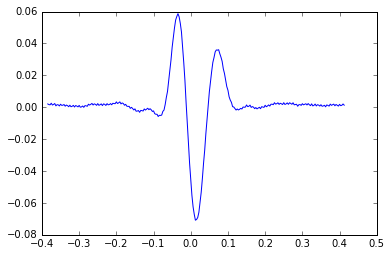

In [4]:
pl.plot(t,A)
pl.show()

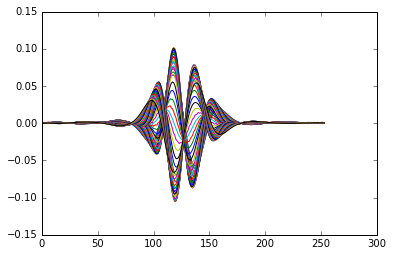

In [9]:
for ii in range(1,50,1):
    tau = (ii-25.00001)/100.0 #s [ in dimensions of 1/f]
    k_v = 1/((1/tau)+1j*2*np.pi*f) #kernel *fourier transform of e^-t/Tau
    n = 0.2#lower number filters out more high frequencies
    sig = n*(2*np.pi)/(tau)           
    H = (1/(sig*np.sqrt(2*np.pi)))*np.exp(-(f**2)/(2*sig**2)) #gaussian
    B = H*A_f/k_v #fourier transform of interferogram times gaussian divided by kernel
    c = np.fft.irfft(B) #inverse fourier transform of deconvolved spectrum
    #pl.plot(tau, (np.max(c[0:118])-np.max(c[118:]))/np.abs(np.ptp(c)), '+k')
    pl.plot(c, label=str(tau))
    
    #pl.plot (30*f,np.abs(A_f), label = 'convoluted spectrum') 
    #pl.plot(30*Nu, np.abs(B), label = 'deconvoluted spectrum')
    #pl.plot(30*Nu, np.abs(A_f)/55, label ='int')


#L=np.sum(np.abs(np.fft.rfft(c))/k_v*tau)
#pl.plot(300*NuFull, (1/L)*np.abs(np.fft.rfft(c))/k_v*tau, label = 'normalized spectrum')

#axes = pl.gca()
#axes.set_xlim([0,0.5*1e14])
#axes.set_ylim([0,12])
#pl.axvline(x=118)
#pl.legend()

pl.show()

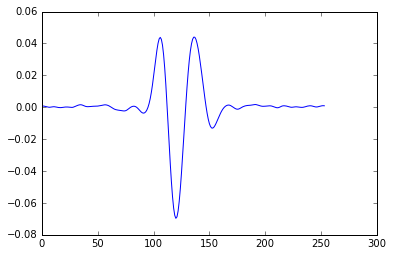

In [117]:
tau = .05 #s [ in dimensions of 1/f]
k_v = 1/((1/tau)+1j*2*np.pi*f) #kernel *fourier transform of e^-t/Tau
n = 0.2#lower number filters out more high frequencies
sig = n*(2*np.pi)/(tau)           
H = (1/(sig*np.sqrt(2*np.pi)))*np.exp(-(f**2)/(2*sig**2)) #gaussian
B = H*A_f/k_v #fourier transform of interferogram times gaussian divided by kernel
c = np.fft.irfft(B) #inverse fourier transform of deconvolved spectrum
#pl.plot(tau, (np.max(c[0:118])-np.max(c[118:]))/np.abs(np.ptp(c)), '+k')
pl.plot(c, label = 'aerga')

[13]


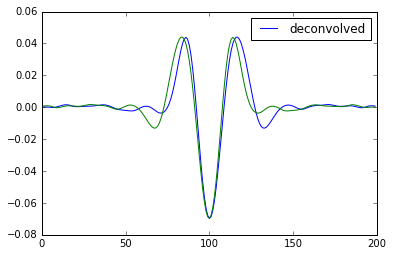

-0.000520378150384


In [130]:
#pl.plot(t, A, label = 'not deconvolved')

pl.plot(c[miin-100:miin+100], label = 'deconvolved')
minindx=(np.where(c==np.min(c)))

miin = minindex[0]

C = np.flipud(c)
minindx1=(np.where(C==np.min(C)))
minindex1 =minindx1[0]
miin1= minindex1[0]
dif = minindex1 - minindex
print dif

pl.plot(C[miin1-100:miin1+100])

pl.legend()
pl.show()

print np.sum(c[miin-100:miin+100]-C[miin1-100:miin1+100])

#use yt as c


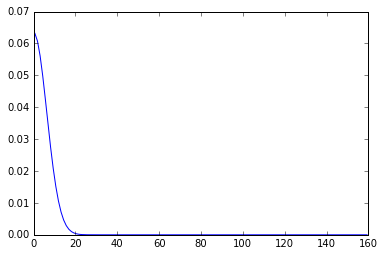

In [169]:
tauset = np.linspace(0.01, .1, 700)
asym1set = np.zeros(np.shape(tauset))
asym2set = np.zeros(np.shape(tauset))
asym3set = np.zeros(np.shape(tauset))
Ns = 20
sig = n*(2*np.pi)/0.2        
H = (1/(sig*np.sqrt(2*np.pi)))*np.exp(-(f**2)/(2*sig**2))
pl.plot(f,H)

In [170]:
for ii in range(0,len(tauset)):
    
    tau = tauset[ii] #s [ in dimensions of 1/f]
    k_v = 1/((1/tau)+1j*2*np.pi*f) #kernel *fourier transform of e^-t/Tau
    n = 0.2#lower number filters out more high frequencies
    sig = n*(2*np.pi)/0.1 
    H = (1/(sig*np.sqrt(2*np.pi)))*np.exp(-(f**2)/(2*sig**2)) #gaussian
    B = H*A_f/k_v #fourier transform of interferogram times gaussian divided by kernel
    c = np.fft.irfft(B) #inverse fourier transform of deconvolved spectrum
    minindx=(np.where(c==np.min(c)))
    #print(np.ravel(minindx[0]) )
    minindex =minindx[0]
    asym1set[ii]= np.max(c[0:minindex])-np.max(c[minindex:])
    
    
    minindx=(np.where(c==np.min(c)))
    minindex =minindx[0]
    miin = minindex[0]

    C = np.flipud(c)
    minindx1=(np.where(C==np.min(C)))
    minindex1 =minindx1[0]
    miin1= minindex1[0]
    
    
    asym2set[ii]= np.sum(c[miin-Ns:miin+Ns]-C[miin1-Ns:miin1+Ns])**2
    
    
    cleft = c[0:minindex]
    cright=c[minindex:]
    minlen = np.min([len(cleft),len(cright)])
    cleft = np.flipud(cleft)
    #asym2set[ii] = np.sum(np.abs(cleft[:minlen] - cright[:minlen]))
    #asym2set[ii] = np.dot(cleft[:minlen], -cright[:minlen])
    #pl.plot(c[miin-100:miin+100],'-r')
    #pl.plot(C[miin1-100:miin1+100],'-b')
    #pl.plot(np.abs(cleft[:minlen] - cright[:minlen]))
    #pl.title(str(tau))
    #pl.show()
    
    

/Users/Lab/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/Lab/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:29: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/Lab/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:30: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


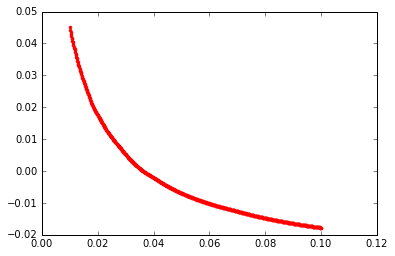

In [171]:
pl.plot(tauset,asym1set, '.r')
#when c is yt, should cross 0 at tau = 0

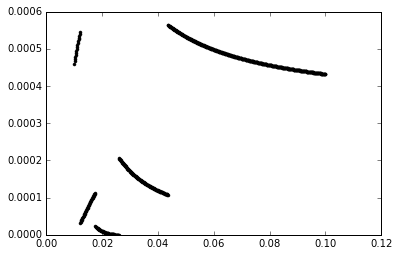

In [172]:
pl.plot(tauset,asym2set,'.k')

1.2999999999999998